# Lab 7.04 - Time series analysis

In [2]:
# Package imports
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
# Package imports for time series analysis
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\vinni\AppData\Local\Temp\ipykernel_20044\4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


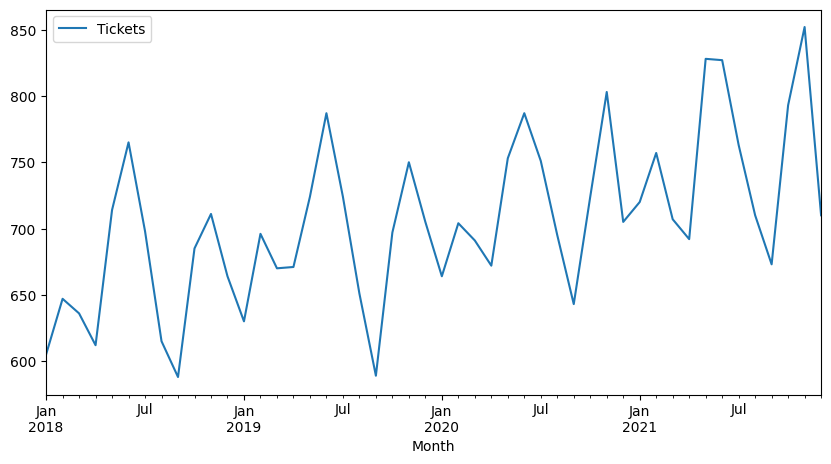

In [11]:
data.plot( y='Tickets', figsize=[10,5]);

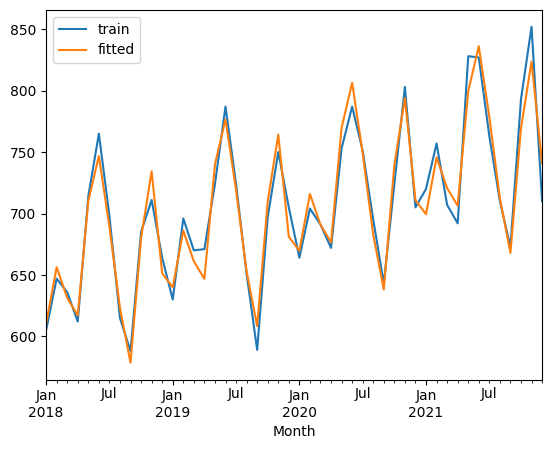

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

tickets_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
(tickets_hw.level + tickets_hw.season).plot(legend=True, label='fitted');

In [15]:
tickets_predicted = tickets_hw.forecast(12)
tickets_predicted

2022-01-01    729.210749
2022-02-01    775.460783
2022-03-01    750.459653
2022-04-01    736.210740
2022-05-01    829.209334
2022-06-01    865.958965
2022-07-01    808.462455
2022-08-01    742.210599
2022-09-01    697.708688
2022-10-01    799.206916
2022-11-01    853.454453
2022-12-01    770.457475
Freq: MS, dtype: float64

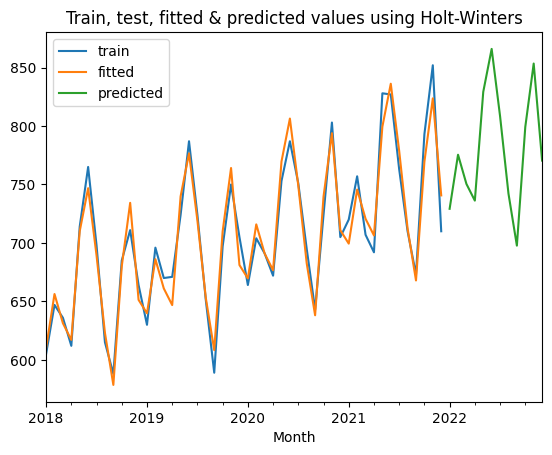

In [16]:
train.plot(legend=True, label='train')
tickets_hw.fittedvalues.plot(legend=True, label='fitted')

tickets_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters');

## Source
Business Analytics Data Analysis & Decision Making 